<img 
    style="display: block; 
           margin-left: auto;
           margin-right: 0;
           width: 30%;"
    src="Maple-Transactions-logo.png" 
    alt="The Maple Transactions Logo">
</img>

<h1 style="text-align: center;">Two-cycles in the infinite exponential tower</h1>

<h3 style="text-align: center;">Robert M. Corless, David J. Jeffrey, and Johan Joby </h3>



__Abstract__ The infinite tower iteration $c_{n+1} = e^{c_n} \lambda$ starting with $c_1 = 0$ has stable two-cycles for some values of $\lambda$. We denote such a two-cycle by $B = e^A \lambda$ together with $A = e^B \lambda$.  Transforming variables by $\zeta e^{-\zeta} = \lambda$, which simplifies things considerably in the one-cycle case, the region of the $\zeta$ plane which contains the parameter values which give rise to these steady two-cycles looks vaguely like an insect larva, with curiously "scalloped" edges.  In this paper we look at the details of an analytic expression for the two-cycles in order to understand why this region looks the way it does.  We give a complete explanation of the cusps on the boundary that give the "scalloped" look. 

__Key words and phrases__: tetration; dynamical systems; two-cycles; Lambert $W$ function; parametric solution; path following

__Recommended Reference Format__: Robert M. Corless, David J. Jeffrey, and Johan Joby, _Two-cycles in the infinite exponential tower_, Maple Transactions, Volume 3, Issue 4.  https://doi.org/10.5206/mtv3i4.XXXXX 

<sub>Permission to make digital or hard copies of all or part of this work for personal or classroom use is granted without fee provided that copies bear this notice and the full citation on the first page. Copyrights for components of this work owned by others must be honored. Abstracting with credit is permitted.
© 2023 Copyright held by the owner/author(s). 
Publication rights licensed to Maple Transactions, under Creative CommonsCC-BY 4.0 License. https://doi.org/10.5206/mt.v3i4.XXXXX</sub>


### Introduction

The well-studied infinite exponential tower
\begin{equation}
    z^{z^{z^{\cdot^{\cdot^{\cdot}}}}} = y
\end{equation}
can be rewritten as the iteration $a_{n+1} = z^{a_n}$ or, equivalently via $a_n = e^{c_n}$, as $c_{n+1} = e^{c_n}\ln z$.  To neaten things further, write $\lambda$ for $\ln z$.  If we transform by $\zeta e^{-\zeta} = \lambda = \ln z$, then the values of $z$ which lead to convergence of the iteration (i.e. to a one-cycle) are described by $|\zeta|<1$ and those values of $\zeta$ on the unit circle which have angles $r\pi$ for some rational number $r$.  

Pictorially, this is
<img 
    style="display: block; 
           margin-left: auto;
           margin-right: auto;
           width: 30%;"
    src="Image3.png" 
    alt="The infinite tower fractal">
</img>

We can see the unit disk in purple, and extending to the left (in the $\zeta$ plane) we see the curiously scalloped region where two-cycles are stable, depicted in a kind of green colour.  In particular, for real values of $z$ in the interval $(0, e^{-e})$, there exists a stable two-cycle.  

This image, obtained by numerical computation for many values of $z$ and post-processing to detect cycle length, is described in more detail in our previous paper (listed below, in the references section). The purpose of this present note is to explain the scalloped shape of the region where the two-cycles are stable, and incidentally to confirm that its appearance in the figure is genuine and not a numerical artifact.


As an example, take $z=0.01$ and so $\lambda = \ln z \approx -4.605$.  Then after $50$ iterations the iteration settles down to alternating between $A = -4.33571416541924$ and $B = -0.0602932851028581$.  Using higher precision just confirms these.

In [1]:
Digits := 15;
N := 52;
c := Array(1..N); # Start from c[1] = 0
lambda := ln( 0.01 );
for k from 2 to N do
  c[k] := exp(c[k-1])*lambda;
end do:

                          lambda := -4.60517018598809

In [2]:
c[N-3], c[N-2], c[N-1], c[N] 

$$- 0.0602932851028571,- 4.33571416541924,- 0.0602932851028581,- 4.33571416541924$$

Still, we would like some kind of analytic confirmation.

### Solving for $A$ in terms of $B$

Euler was able to give a parametric solution for the two-cycles, which isn't all that different to what we will show below.  But we use modern notation and the Lambert $W$ function.  First, we eliminate $\lambda$:
\begin{equation}
B e^{-A} = \lambda = A e^{-B}
\end{equation}
so
<a id="eq:AEA=BEB"></a>
\begin{equation}
A e^A = B e^B . 
\end{equation}
Solving this for $A$, we have
\begin{equation}
A = W_k\left( Be^B \right)
\end{equation}
where $W_k$ denotes the $k$th branch of the Lambert $W$ function.
This means that given a value for $B$, we can find a value for $A$ which gives a two-cycle in this iteration.  This works for _any_ $B$.  For instance, we might take $B = \pi$, and then $A$ can be any one of the following (or more):

In [3]:
alias( W = LambertW );
B := evalf(Pi):
seq( W(k,B*exp(B)), k=-5..5 )

                                       W

$$ 0.888862317711764- 29.8748742731569 \,\mathrm{I}, 1.12354241139897- 23.6094976041825 \,\mathrm{I}, 1.42872879507636- 17.3608704790344 \,\mathrm{I}, 1.86022012175707- 11.1607315259371 \,\mathrm{I}, 2.53588667951342- 5.16852113181535 \,\mathrm{I}, 3.14159265358979, 2.53588667951342+ 5.16852113181535 \,\mathrm{I}, 1.86022012175707+ 11.1607315259371 \,\mathrm{I}, 1.42872879507636+ 17.3608704790344 \,\mathrm{I}, 1.12354241139897+ 23.6094976041825 \,\mathrm{I}, 0.888862317711764+ 29.8748742731569 \,\mathrm{I}$$

For instance, let us take the case $k=3$ case.

In [4]:
A := W(3,B*exp(B));

$$ 1.42872879507636+ 17.3608704790344 \,\mathrm{I}$$

Let's check if this is a two-cycle:

In [5]:
lambda := B*exp(-A);

$$ 0.0617409693715575+ 0.750231237868928 \,\mathrm{I}$$

In [6]:
exp(A)*lambda - B;

$$ 0.0-{ 5.99690106833307\times 10^{-16}} \mathrm{I} $$

In [7]:
exp(B)*lambda - A;

$$ 6.9\times 10^{-13}- 1.0\times 10^{-13} \mathrm{I}$$

So it seems that within roundoff error we have a two-cycle.  Let's find out which $\zeta$ this corresponds to:

In [8]:
zet := solve( zeta*exp(-zeta) = lambda );

kilobytes used=5464, alloc=10801, time=0.73

$$- 0.252185030330958+ 0.527825715583379 \,\mathrm{I}$$

But it turns out that this is not a _stable_ two-cycle.  What does that mean?

In [9]:
c := Array(1..N):
c[1] := B:
for k from 2 to N do
  c[k] := exp(c[k-1])*lambda;
end do:
seq( c[k], k=N-5..N );

$$- 0.252185382448935+ 0.527825800033384 \,\mathrm{I},- 0.252184986106959+ 0.527825508429467 \,\mathrm{I},- 0.252184932142417+ 0.527825791167051 \,\mathrm{I},- 0.252185094987648+ 0.527825748348745 \,\mathrm{I},- 0.252185031319911+ 0.527825673192983 \,\mathrm{I},- 0.252185007706818+ 0.527825725751608 \,\mathrm{I}$$

The sequence reasonably quickly left the two-cycle and instead settled down on a fixed point, also called a one-cycle.  When we check the absolute value of $\zeta$, we find that it is inside the unit disk.  

In [10]:
abs( zet );

$$ 0.584976303412482$$

What about a different value of $k$?  The value $k=3$ was chosen on a whim.

In [11]:
A := W(8,B*exp(B));

$$ 0.400549932568168+ 48.7029102983438 \,\mathrm{I}$$

In [12]:
lambda := B*exp(-A);

$$ 0.0173093320464883+ 2.10464358484047 \,\mathrm{I}$$

In [13]:
N := 15:
c := Array(1..N):
c[1] := B:
for k from 2 to N do
  c[k] := exp(c[k-1])*lambda;
end do:
seq( c[k], k=N-5..N );

$$ 0.399640243678573+ 48.7030010461479 \,\mathrm{I}, 3.13873606822628+ 0.000284833406622972 \,\mathrm{I}, 0.385574698952249+ 48.5640965929283 \,\mathrm{I}, 3.06512676650528- 0.428235737065400 \,\mathrm{I}, 19.0733931243451+ 40.8894017280941 \,\mathrm{I}, 1.63572442713467\times 10^{7}- 4.03930672904718\times 10^{8} \mathrm{I}$$

We tried $k=2$, $3$, $\ldots$, up to $7$ and found fixed points.  Here with $k=8$ we seem to see divergence to infinity (we stopped the iteration at $N=15$).  What is the value of zeta here?

In [14]:
zet := solve( zeta*exp(-zeta) = lambda );

$$- 0.707481222066804+ 0.758701855006845 \,\mathrm{I}$$

In [15]:
abs(zet);

$$ 1.03738044340925$$

This is outside the unit disk, and so the one-cycle is unstable as well.  In all those cases the two-cycle that we started with (up to roundoff error) got quickly swamped by the growth of the roundoff error, and the iteration moved away from the starting two-cycle, and towards something else.

This raises the question: just when is a two-cycle stable?

### The stability criterion and the boundary $AB = e^{i\theta}$

A  _periodic orbit_ or cycle $\{ c_k \}_{k=1}^p$ of the _dynamical system_ $c_{n+1} = F(c_n)$ is called _stable_ if the product of the derivatives of $F$ evaluated on the orbit 
\begin{equation}
\prod_{k=1}^p F'(c_k)
\end{equation}
has magnitude less than $1$.  Why is this?  Suppose $c_1$ depends on some parameter, say $\alpha$.  Then if we want to know how any subsequent $c_k$ depends on $\alpha$, we could investigate
\begin{equation}
\frac{dc_k}{d\alpha} = F'(c_{k-1})\frac{dc_{k-1}}{d\alpha} . 
\end{equation}
Then by induction the derivative is just the product of all the previous $F'(c_j)$.  For a periodic orbit, if this number is smaller than $1$ in magnitude, then small disturbances at the beginning are damped out by continuing the iteration.

Here we have $F(z) = e^z\lambda$ and so $F'(z) = e^z\lambda = F(z)$, and so we have the simple formula that for a two-cycle the product of the derivatives is just $AB$.  We are therefore interested in finding all $\zeta$ for which $|AB| < 1$.  This suggests investigating the boundary where the magnitude is exactly $1$.  We can parameterize that as
\begin{equation}
AB = e^{i\theta}
\end{equation}
for some $\theta$.  Since we have an analytical formula for $A$ in terms of $B$, this gives
\begin{equation}
W_k\left(B e^B\right)B = e^{i\theta} .
\end{equation}

Below, we see a picture of the region $|AB|<1$, computed in Maple and coloured by using Paint3D.  The outer boundary is where $|AB|=1$, and the inner colours show the regions with different values of $k$.  The two gray-coloured regions on the right have $k=1$ (above the real axis) and $k=-1$ (on and below the real axis).  The red coloured regions have $k=2$ (above the real axis) and $k=-2$ (below the real axis), and so on.  Each region is closed on the curve above the region.  Notice that this makes the picture _asymmetric_.  The regions are _not_ closed on the outer boundary: there are values of $\zeta$ on that boundary for which the corresponding two-cycle is not stable.  This picture, based on the above analytical formula, is in complete agreement with the numerical results in our first figure.
<img 
    style="display: block; 
           margin-left: auto;
           margin-right: auto;
           width: 100%;"
    src="TwoCycleSolid.png" 
    alt="The two-cycle regions">
</img>

The rest of this paper is a discussion of how we computed this figure, and of its curious features.  Notice, for instance, that the branch changes do _not_ line up with the cusps of the scalloping.  Instead (and this surprised us) the outer boundary is smooth when the branches change from $k$ to $k+1$ or vice-versa!

### Using Karamata's series for $k=1$ and $k=-1$

We are going to use _path following_ to trace out the curve defined by $W_k(B\exp B)B = \exp(i\theta)$.  A natural place to start is where the two-cycles meet the one-cycles, at $\zeta=-1$.  However, the degree of contact there is greater than one; that is, there is a multiple root there.  This makes path-following methods cranky.  We will need a special way to get started, and it turns out that there is some classical theory available that will help.

The equation $A\exp A = B \exp B$ really says that $A$ and $B$ are two different branch values of the Lambert $W$ function of the same thing.  If the branch indices are the same, then $A=B$ and the two-cycle is really a one-cycle, so we exclude that case. We now look at the case where $B$ is in the range of the zeroth branch of Lambert~$W$ and $A$ is in either the $k=1$ branch or the $k=-1$ branch.  Moreover we presume that both $A$ and $B$ are such that $\lambda = A\exp(-B) = B\exp(-A)$ is near to $-e$, so that $\zeta$ is near to $-1$, corresponding to the right end of the figure.  In this case, we can say that $B = -1+\mu$ and think of $\mu > 0$ while $A = -1 - \sigma$ and again think of $\sigma > 0$.  The fundamental equation $A\exp A = B \exp B$ then becomes
\begin{equation}
-(1+\sigma)e^{-1-\sigma} = (-1+\mu)e^{-1+\mu}
\end{equation}
which, on multiplication by $-e$, simplifies to
\begin{equation}
(1+\sigma)e^{-\sigma} = (1-\mu)e^\mu .
\end{equation}
Notice that the trivial (one-cycle) solution $A=B$ gets translated here into $\sigma=-\mu$.  We are looking for the other solution, where the branch changes.

This is Karamata's equation, and he came up with the series solution
\begin{equation}
\sigma = \mu +\frac{2}{3} \mu^{2}+\frac{4}{9} \mu^{3}+\frac{44}{135} \mu^{4}+\frac{104}{405} \mu^{5}+\mathrm{O}\left(\mu^{6}\right)
\end{equation}
which we can reproduce in Maple to whatever order we desire (we show how in Appendix A).  Karamata computed up to $O(\mu^{15})$ by hand, and proved that the coefficients behaved like $O(1/n)$, which means that the radius of convergence of this series is $1$.

Now, solving equations in series is a bit of an old-fashioned skill these days, but we need it here to get the more modern path-following method (also called _homotopy continuation method_) started.  We think it's worth explaining, so instead of giving the full solution with Maple (which we do in Appendix A, as we mentioned) we will go through an overview "by hand" using only a few terms of the series.  The first equation that we want to use Karamata's series in is 
\begin{equation}
AB = -(1+\sigma)(-1+\mu) = e^{i\theta} .
\end{equation}
If we just use the first two terms $\sigma = \mu + 2\mu^2/3 + \cdots$ this equation becomes
\begin{equation}
-(1+\mu+\frac{2}{3}\mu^2 + \cdots)(-1+\mu) = 1 - \frac{1}{3}\mu^2 + \cdots = e^{i\theta} .
\end{equation}
Solving this for $\mu$ gives us _two_ solutions, whose leading terms are
\begin{equation}
\mu = \pm \sqrt{3\left(1-e^{i\theta}\right)} + \cdots
\end{equation}


With either of these two values of $\mu$ we can then evaluate $\zeta$ where
\begin{equation}
\zeta e^{-\zeta} = \lambda = Ae^{-B} = -(1+\sigma)e^{1-\mu} = -e^{-1}\left( 1 + \frac{1}{6}\mu^2 + \cdots\right )
\end{equation}
In order to get that last equality, we checked with Maple:

In [16]:
series( -(1+mu+2*mu^2/3 + O(mu^3))*exp(1-mu), mu );

$$-{\mathrm e}-\frac{1}{6} {\mathrm e} \mu^{2}+\mathrm{O}\left(\mu^{3}\right)$$

Now we can explicitly write $\zeta = -W_0(-\lambda)$ but it's instructive to solve this in series, too: we know that $\zeta$ is near to $-1$ and so we look for a series of the form $\zeta = -1 + \alpha\mu + O(\mu^2)$.  By comparing this with the desired right-hand side above, we will be able to identify $\alpha$.

In [17]:
series( (-1+alpha*mu + O(mu^2))*exp(1+alpha*mu+O(mu^2)), mu );

$$-{\mathrm e}+\mathrm{O}\left(\mu^{2}\right)$$

So $2\alpha = -1/6$ and therefore $\alpha = -1/12$.  This means that 
\begin{equation}
\zeta = -1 -\frac{1}{12}\mu^2 + O(\mu^3)
\end{equation}
and, using $\mu = \pm \sqrt{3(1-\exp i\theta)} + \cdots$, we get
\begin{equation}
\zeta = -1 - \frac{1}{4}(1-e^{i\theta}) + \cdots .
\end{equation}

Now we could do this computation all over again, but this time using Maple to keep more terms, but first let's see if this is enough to get the path-following algorithm started successfully.  We choose some small angle, not zero.  Say, $2\pi/100$.

In [18]:
phi0 := evalf(2*Pi)/100;

$$ 0.0628318530717958$$

The series solution predicts that

In [19]:
zety := -1 - (1-exp(I*phi0))/4;

$$- 1.00049331789293+ 0.0156976298823283 \,\mathrm{I}$$

In [20]:
muf := sqrt( 3*(1-exp(I*phi0)));

$$ 0.311756611143974- 0.302113173954389 \,\mathrm{I}$$

The approximate value of $B$ at that angle is

In [21]:
B := -1 + muf;

$$- 0.688243388856026- 0.302113173954389 \,\mathrm{I}$$

The value of $A$ that is predicted is

In [22]:
A := -1 - muf - 2*muf^2/3;

$$- 1.31570315428742+ 0.427694213013016 \,\mathrm{I}$$

In [23]:
W(1,B*exp(B)), W(-1,B*exp(B));

$$- 1.27710728542476+ 0.450984667012768 \,\mathrm{I},- 3.04770553603438- 7.34935128763070 \,\mathrm{I}$$

The first one is closer; so we seem to have successfully approximated the $k=1$ branch.  What about the other sign for $\mu$? It seems to do pretty much the same thing.  Indeed to get the $k=-1$ branch we would need to take $\theta$ to be _negative_.  So if we had chosen $-2\pi/100$ we would have wound up on the $k=-1$ branch.  All right, from now on we will look at $k=1$.

In [24]:
W(1, (-1-muf)*exp(-1-muf)), W(-1, (-1-muf)*exp(-1-muf))

$$- 1.31175661114397+ 0.302113173954389 \,\mathrm{I},- 3.09444622510751- 7.38125971448919 \,\mathrm{I}$$

In [25]:
A*exp(A) ;

$$- 0.368781901497561- 0.0420000460846001 \,\mathrm{I}$$

In [26]:
B*exp(B);

$$- 0.375317477680735- 0.0420314266125890 \,\mathrm{I}$$

In [27]:
abs( A*B );

$$ 1.03986308156898$$

That's a little too big, so we really want to see if we can correct that initial approximation.  We use fsolve, with that initial approximation as a hint.

In [28]:
b1 := fsolve( W(1,b*exp(b))*b-exp(I*phi0), b=B );

$$- 0.694360261884836- 0.245136054281221 \,\mathrm{I}$$

This gives us a point on the curve, and our approximation from the series wasn't too far off, being $-0.68 - 0.3i$.

Now that we have a starting point away from the double root, we can simply solve the nonlinear equation $AB = \exp(i\theta)$ for $B$ using different values of $\theta$, using our previous solution as the initial approximation.  We don't have to write our own Newton's method here because __fsolve__ works fine.

In [29]:
N := 100:
B := Array(1..N):
zea := Array(1..N):
B[1] := b1:
A := Array(1..N):
A[1] := W(1,b1*exp(b1)):
zea[1] := -W(0,-A[1]*exp(-B[1])):
phi := Array(1..N, i->evalf(2*Pi*i/N)):
for k from 2 to N do
    B[k] := fsolve(LambertW(1, b*exp(b))*b - exp(phi[k]*I), b = B[k - 1]);
    if not type(B[k], complex(numeric)) then
        break;
    end if;
    A[k] := W(1,B[k]*exp(B[k]));
    zea[k] := -W(0, -A[k]*exp(-B[k]) );
end do:
Npts := k-1; # Loop might terminate early

                                  Npts := 83

$$83$$

So we did not get all the way around the curve, but let's look at how far we got.

kilobytes used=218558, alloc=18480, time=21.00

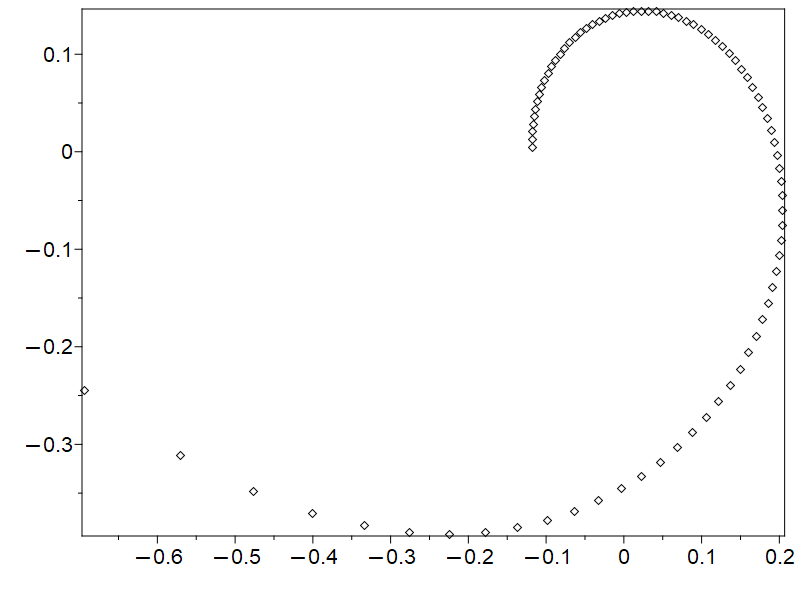

In [30]:
bplot[1] := plot( [seq([Re(B[k]),Im(B(k))], k=1..Npts )], style=point);

In fact that curve should go all the way out to $-1$ on the left.  This indicates that the awkwardness of the multiple root at $-1$ is stronger than we had thought.  If we repeat the computation with an original $\phi_0$ closer to $0$, one wonders what would happen.  [Of course we did this, though we don't show the computations here: our original $\phi_0 = 2\pi/100$ was replaced by something a hundred times smaller, and sure enough we got a point closer to $b=-1$ on this graph.]  But it doesn't really matter: we know from the series computation just what the shape of the stable two-cycle region must be, near that point.

But let's see how good the first term in the series approximation was.  We plot it in red for a finite range of $\phi$ on the same plot.

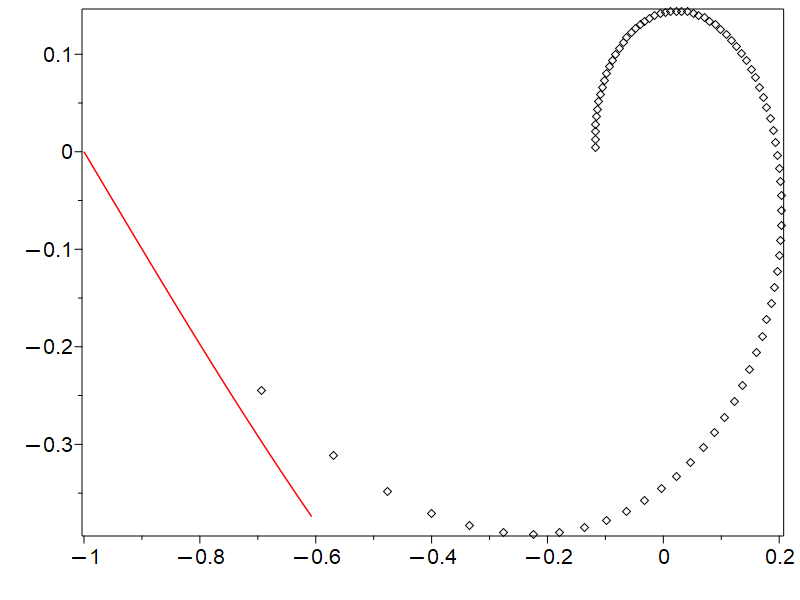

In [31]:
ApproxB := -1 + sqrt( 3*(1-exp(I*theta))):
Approxzeta :=  -1 - (1-exp(I*theta))/4:
approxplot := plot( [Re(ApproxB),Im(ApproxB), theta=0..Pi/32], colour=red):
plots[display]( approxplot, bplot[1]);

The answer is that it was pretty good (more terms would have been better).  So, now we use these computations to draw the outer edge of the $k=1$ branch.

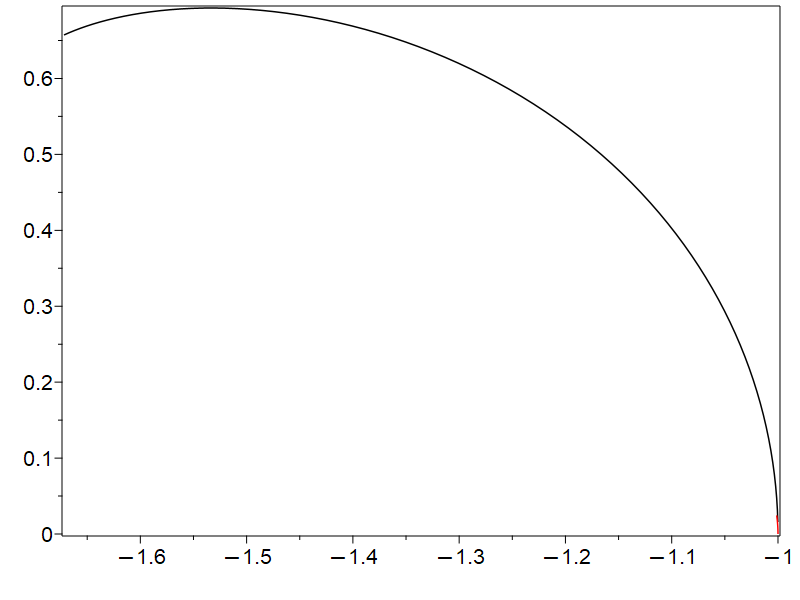

In [32]:
zplot[1] := plot( [seq([Re(zea[k]),Im(zea(k))], k=1..Npts )]):
approxzetaplot := plot( [Re(Approxzeta),Im(Approxzeta),theta=0..Pi/32], color=red):
plots[display](zplot[1],approxzetaplot);

We need to fix one more thing, which is that we need to close the curve on the right.  The curve in the $B$ plane comes down and touches the negative real axis at about $b=-0.117$.  We need to find that more precisely, to add the final point on the boundary curve.

In [33]:
B[Npts], zea[Npts];

$$- 0.117548159582882+ 0.00483706958973719 \,\mathrm{I},- 1.67182995503958+ 0.657269968056123 \,\mathrm{I}$$

It's convenient to use Cartesian coordinates for this, because we don't know the precise $\theta$ value at which this intersection occurs.  We can compute it afterwards, of course.

In [34]:
stopper := W(1,b*exp(b))*b:
U := evalc(Re(stopper)): # b assumed real and negative
V := evalc(Im(stopper)):
B[Npts+1] := fsolve( U^2+V^2-1, b=-0.117);

$$- 0.117143891350266$$

In [35]:
zea[Npts+1] := -W(0, -W(1,B[Npts+1]*exp(B[Npts+1]))*exp(-B[Npts+1]));

$$- 1.67463721711223+ 0.655426628303257 \,\mathrm{I}$$

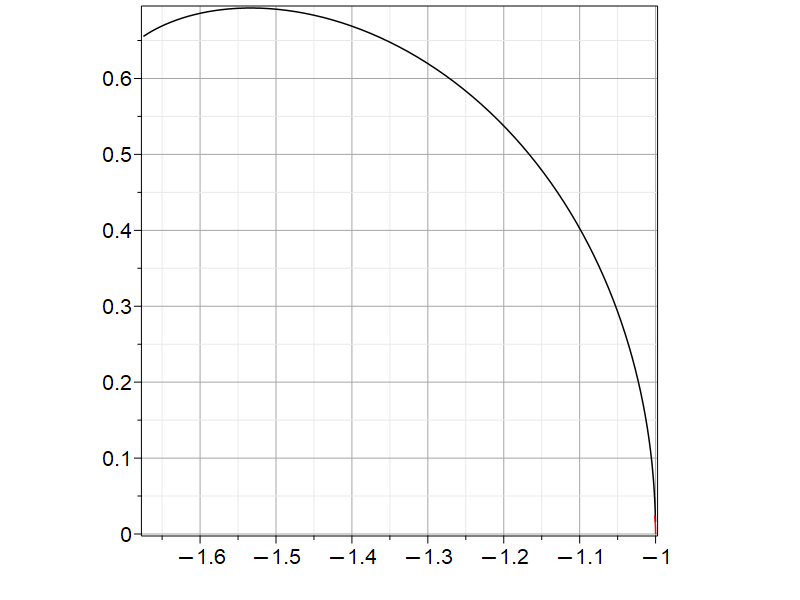

In [36]:
zplot[1] := plot( [seq([Re(zea[k]),Im(zea(k))], k=1..Npts+1 )]):
plots[display](zplot[1],approxzetaplot, scaling=constrained, gridlines)

Now to complete this graph, we have to include the images of the line _just below_ the real axis from $-1$ to $0$ in the $B$ plane and the line from $b=-0.11714$ to $0$ in the $B$ plane.  These are mapped by $W_1$ and then by the zero branch of $W$ to certain curves in the $\zeta$ plane.

kilobytes used=232102, alloc=18480, time=22.66

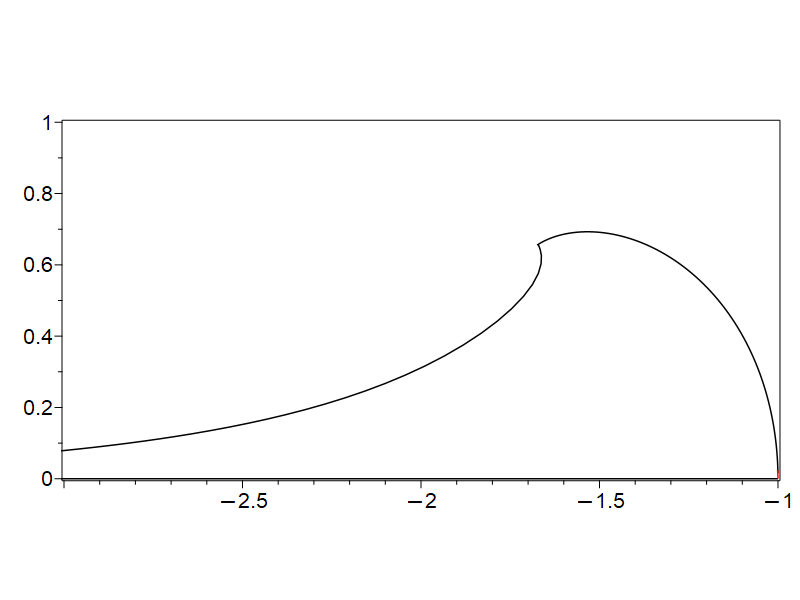

In [37]:
Digits := 200: # Evaluating W very near to 0 is a problem, so increase Digits
scale := 1.05:
# Take the points from *just* closer to 0 than is -1 
# in order to avoid a spurious discontinuity
nscales := 40:
bdat0 := [seq(-(1-Float(1,-Digits/2))*scale^(-i^2)-Float(1,-Digits/2)*I, i=0..nscales )]: # bottom line data
wdat0 := map(t->-W(0,-W(1,t*exp(t))*exp(-t)), bdat0):
bdat1 := [seq( (B[Npts]+Float(1,-Digits/2)*I)*scale^(-i^2), i=0..nscales)]: # top line data
wdat1 := map(t->-W(0,-W(1,t*exp(t))*exp(-t)), bdat1):
lineplot0 := plot( [seq( [Re(wdat0[i]),Im(wdat0[i])], i=1..numelems(wdat0))] ):
lineplot1 := plot( [seq( [Re(wdat1[i]),Im(wdat1[i])], i=1..numelems(wdat1))] ):
plots[display]( lineplot0, lineplot1,zplot[1],approxzetaplot, view=[-3.0..-1,0..1], scaling=constrained );

In [38]:
Digits := 15;

$$15$$

### Simple path following for $|k| > 1$

Now let us compute the edges where $W_k(B\exp B)B= \exp i\theta$ for $k>1$.  The images for $k<0$ will follow from these by simple conjugation: $W_{-k}(z) = \overline{W_k(z)}$.  First, let us find all the places where the path in the $B$ plane crosses the negative real axis.  We already saw above that for $k=1$ the path crosses at about $b=-0.1171$.  Here we will compute the first $11$ places, which will be more than enough for now.  To do this, we will make use of an asymptotic formula
\begin{equation}
B(\theta) = \frac{-e^{2\pi i\theta}}{\frac{\pi}{2} + 2\pi \theta}
\end{equation}
which we will justify in a later section.

In [39]:
Ncrossings := 11:
crossings := Array(1..Ncrossings):
bass := t -> -1/2*exp(2*I*Pi*t)/(Pi*(t - 3/4)): # t is theta-1
small := Float(1,-16):
thetas := Array(1..Ncrossings):
for k to Ncrossings do
  F := W(k,b*exp(b))*b;
  U := evalc(Re(F));
  V := evalc(Im(F));
  crossings[k] := fsolve( U^2 + V^2 - 1, b=evalf(bass(k)) );
  thetas[k] := argument( eval(F, b=crossings[k]+I*small) ):
end do:

kilobytes used=237938, alloc=18480, time=23.48

In [40]:
seq( evalf[4](crossings[k]), k=1..Ncrossings );

$$- 0.1171,- 0.06756,- 0.04753,- 0.03666,- 0.02983,- 0.02514,- 0.02172,- 0.01912,- 0.01708,- 0.01543,- 0.01407$$

In [41]:
seq( thetas[k], k=1..Ncrossings );

$$- 1.02848363891604,- 1.19322057552305,- 1.27464451555537,- 1.32458601629258,- 1.35879078212017,- 1.38387681681564,- 1.40315973828624,- 1.41850003717619,- 1.43102878054567,- 1.44147609773526,- 1.45033585526962$$

Now we path-follow $AB = \exp i\theta$ from each of those locations.

In [42]:
N := 100:  # 20 gives bumpy curves, and is only 10 seconds faster
Bk := Array(2..Ncrossings, 0..N):
Ak := Array(2..Ncrossings, 0..N):
zeta := Array(1..Ncrossings, 0..N):
Nptsk := Array(1..Ncrossings):
Nptsk[1] := Npts:
for k from 2 to Ncrossings do
  Bk[k,0] := crossings[k-1] - I*small; # Start just below where the previous loop left off.
  Ak[k,0] := W(k,Bk[k,0]*exp(Bk[k,0]));
  zeta[k,0] := -W(0,-Ak[k,0]*exp(-Bk[k,0]));
  phi := Array(1..N, i -> thetas[k-1] + evalf(2*Pi*i/N) );
  for ell to N do
    Bk[k,ell] := fsolve(LambertW(k, b*exp(b))*b - exp(phi[ell]*I), b = Bk[k,ell - 1]);
    if not type(Bk[k,ell], complex(numeric)) then
        break;
    end if;
    Ak[k,ell] := W(k,Bk[k,ell]*exp(Bk[k,ell]));
    zeta[k,ell] := -W(0, -Ak[k,ell]*exp(-Bk[k,ell]) );
  end do:
  Nptsk[k] := ell-1; # Loop might terminate early
end do:

kilobytes used=3263034, alloc=18480, time=368.06

kilobytes used=3268101, alloc=18480, time=368.69

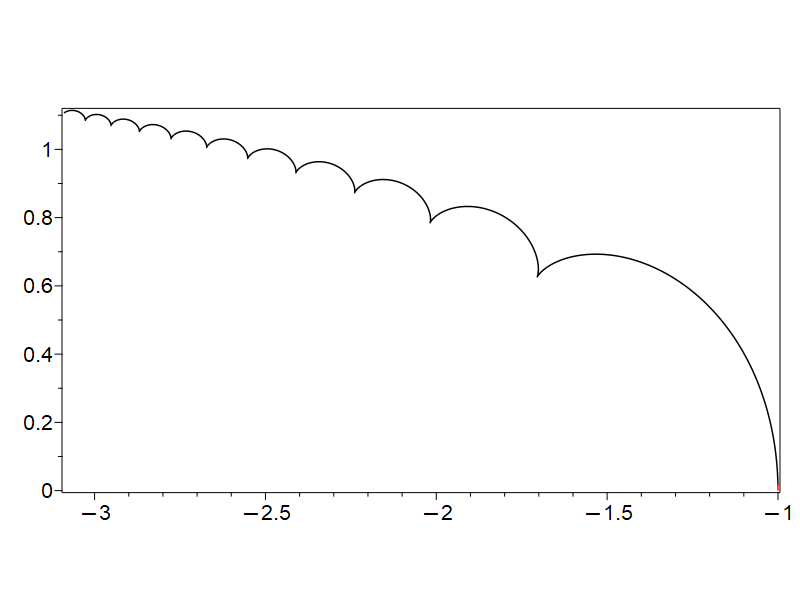

In [43]:
zetaplot := Array(2..Ncrossings):
for k from 2 to Ncrossings do
  Bk[k,Nptsk[k]] := crossings[k]; # Tidy up the final point
  Ak[k,Nptsk[k]] := W(k,Bk[k,Nptsk[k]]*exp(Bk[k,Nptsk[k]]));
  zeta[k,Nptsk[k]] := -W(0,-Ak[k,Nptsk[k]]*exp(-Bk[k,Nptsk[k]]));
  zetaplot[k] := plot( [seq( [Re(zeta[k,ell]),Im(zeta[k,ell])], ell=0..Nptsk[k])] );
end do:
plots[display]( seq( zetaplot[k], k=2..Ncrossings), zplot[1], approxzetaplot, scaling=constrained );

## The edges of each branch region

Computation is pretty straightforward.  Because $W_k(z)$ behaves like $\ln_k(z)$ near $0$ (apart from a half-step by $i\pi$ in the left half plane) we need to take values of $z$ very, very small in order to extend the lines to $\Re(\zeta)=-3$.  We further had to increase digits to get $W_0$ and $W_1$ right, near $0$.  For $k>1$, fifteen Digits suffice.

First, let us look at the branch regions in the $B$ plane.  First is $k=2$ (we already saw $k=1$ up above).

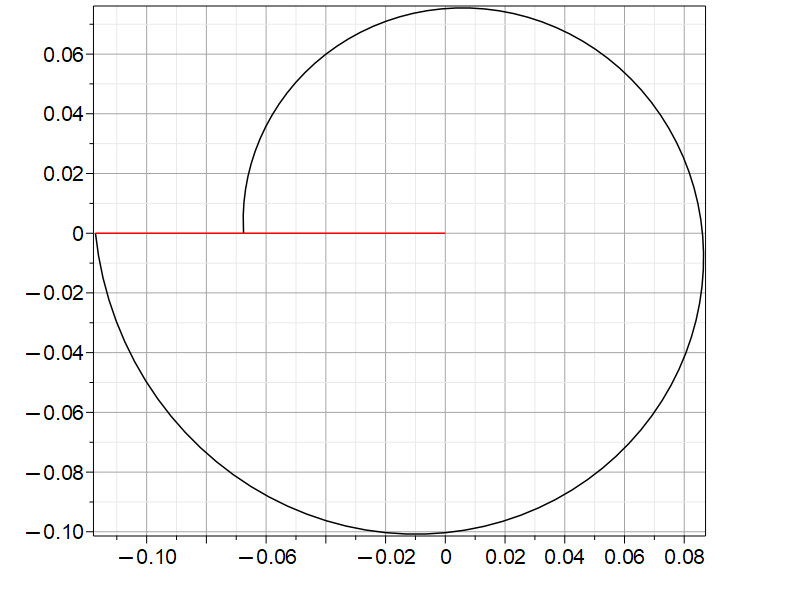

In [44]:
nautilus := Array(2..Ncrossings):
branchcut := Array(2..Ncrossings):
nautilus[2] := plot( [seq([Re(Bk[2,ell]),Im(Bk[2,ell])], ell=0..Nptsk[2])] , scaling=constrained, gridlines):
branchcut[2] := plot( 0, crossings[1]..0, colour=red):
plots[display]( nautilus[2], branchcut[2] );

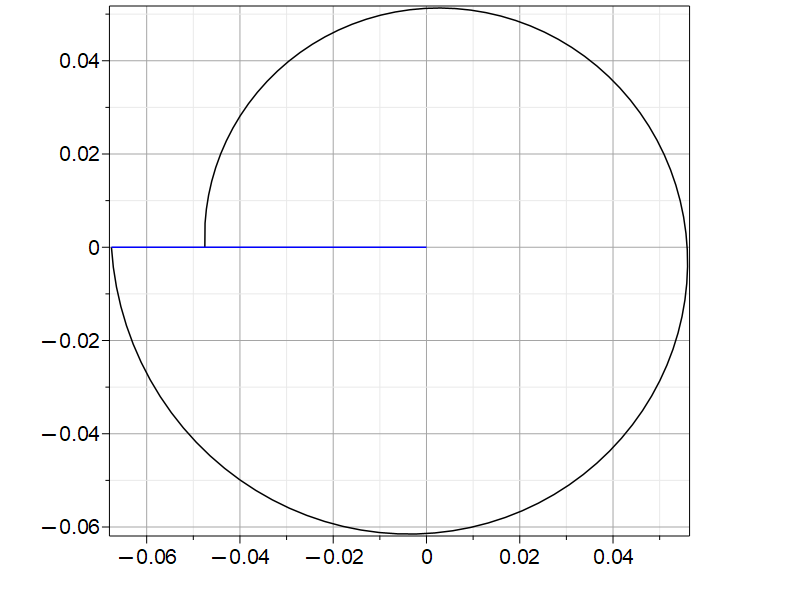

In [45]:
for k from 3 to Ncrossings do
  nautilus[k] := plot( [seq([Re(Bk[k,ell]),Im(Bk[k,ell])], ell=0..Nptsk[k])] , scaling=constrained, gridlines):
  branchcut[k] := plot( 0, crossings[k-1]..0, colour=blue):
end do:
plots[display]( nautilus[3], branchcut[3] );

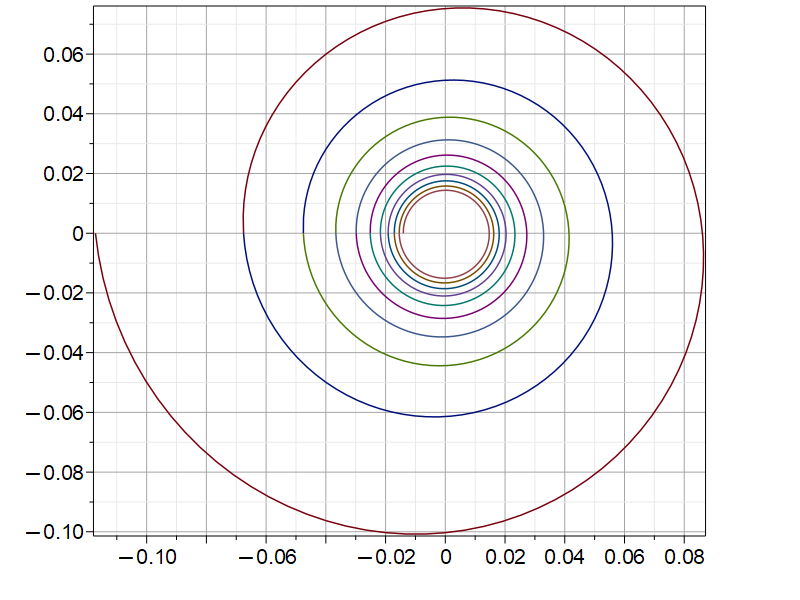

In [46]:
plots[display]( seq(nautilus[k],k=2..Ncrossings) );

We have already plotted the images under $b \to W_k(b\exp b)\exp(-b)$ of those curves, composed with the change of variable to $\zeta$ and they gave the scalloped outer curve which bounded (in the $\zeta$ region) $|AB| < 1$.  Now we need to work out the images of the branch cuts on the negative real axis which separate the stability region into pieces described with the index $k$.

kilobytes used=3280585, alloc=18480, time=370.45

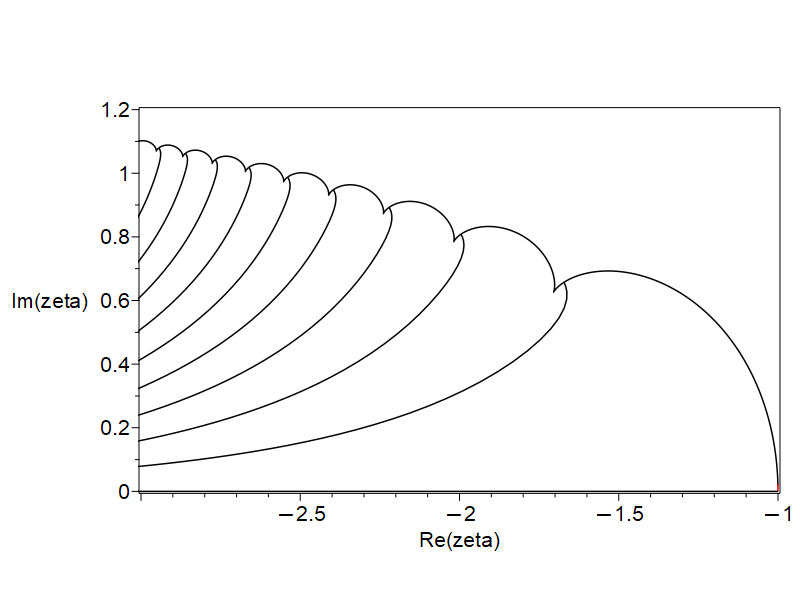

In [47]:
lineplots := Array(2..Ncrossings):
for k from 2 to Ncrossings do
  bdat := [seq( (Bk[k,Nptsk[k]]+small*I)*scale^(-i^2), i=0..nscales)]: # top line data
  wdat := map( t->-W(0,-W(k,t*exp(t))*exp(-t)), bdat );
  lineplots[k] := plot( [seq( [Re(wdat[i]),Im(wdat[i])], i=1..numelems(wdat))]  );
end do:
plots[display]( seq( zetaplot[k], k=2..Ncrossings), 
                zplot[1], approxzetaplot,
                lineplot0, lineplot1,
                seq( lineplots[k], k=2..Ncrossings),
                scaling=constrained, view=[-3..-1,0..1.2], labels=[Re('zeta'),Im('zeta')] );

In this figure, the lowest region contains values of $\zeta$ where $A = W_1( B\exp B )$ and $B$ are the complex numbers that are the stable two-cycle. The next region above it has $A = W_2( B\exp B )$, and the next region above that has $A = W_3( B\exp B )$ and so on.  Of course the relevant values of $B$ are confined to smaller and smaller regions, as well.  Each region is closed on its upper boundary.  The real axis up to $\zeta = -1$ is closed with the symmetric region for $k=-1$ below the real axis.  Each $W_{-k}(B\exp B)$ region is symmetric to the $k$ region shown here, although again they are closed with the boundary on the _top_ not the bottom, which makes the figure globally asymmetric.

### Explanation of the cusps: nonconformality

It was very surprising to us to see those branch-change lines _miss_ the cusps.  We know that the curve $B(\theta)$ in the $B$-plane which follows the stability boundary $AB = \exp i\theta$ is smooth, apart from branch changes. So why the cusps?  The answer turns out to be in the map $B \to W_k(B\exp b)\exp(-B)$.

In [48]:
k := 'k':
G := W(k,b*exp(b))*exp(-b);

$$W \left(k , b \,{\mathrm e}^{b}\right) {\mathrm e}^{-b}$$

So-called _conformal_ maps preserve angles.  An analytic function (such as the above, away from the branch cut) is conformal if and only if its derivative is not zero. So, what is the derivative?

In [49]:
simplify( diff(G,b) );

kilobytes used=3286244, alloc=18480, time=371.20

$$-\frac{W \left(k , b \,{\mathrm e}^{b}\right) {\mathrm e}^{-b} \left(W \left(k , b \,{\mathrm e}^{b}\right) b -1\right)}{b \left(1+W \left(k , b \,{\mathrm e}^{b}\right)\right)}$$

And now we see the issue!  The derivative is zero exactly when $\theta = 0$ on the curve, because $AB = 1$ there, and that makes the factor $W_k(b\exp b)b - 1$ zero.  We see that this happens for $k=2$, $3$, and so on, but not (apparently) for $k=1$.  But in fact it happens for $k=1$ exactly at the starting point&mdash;this is part of the reason it was difficult to start the path following there.

### Asymptotics

Finally, we explain that asymptotic formula we used.  Back when we were exploring this problem, we saw that $B(\theta)$ got smaller and smaller as $k$ increased, and the curve that the stability boundary followed in the $B$ plane was some kind of spiral.  We first fit something empirically to that, but later realized that the product $AB = W_k(B\exp B)B$ is a product of a small value $B$ with something else resulting in a number of unit magnitude.  This meant that $A$ must be large in magnitude.  And in fact we know that $A$ lies in the range of $W_k$, which puts constraints on how small $A$ can be: its minimum is $O(k)$ as $k$ increases.  By taking as a crude approximation that $A$ ranges from $\pi/2 + 2\pi(k-1)$ to $\pi/2 + 2\pi k$ in size, which points mark the intersection of the boundaries of $W_k$ with the imaginary axis, this suggests the formula
\begin{equation}
B_a(t) = - \frac{e^{i 2\pi t}}{\frac{\pi}{2} + 2\pi t} .
\end{equation}
It turns out that this semi-empirical estimate fits the observed $B$ curve very well, already by $t=1$.

In [50]:
Ba := t -> -exp(2*Pi*I*t)/(Pi/2 + 2*Pi*t);

t -> -exp(2*I*Pi*t)/(1/2*Pi+2*Pi*t)

In [51]:
seq( evalf[4]( Ba(k) ), k=1..Ncrossings );

$$- 0.1273,- 0.07073,- 0.04895,- 0.03743,- 0.03031,- 0.02546,- 0.02195,- 0.01929,- 0.01720,- 0.01553,- 0.01415$$

In [52]:
seq( k*(Ba(k)-crossings[k])/crossings[k], k=1..Ncrossings );

$$ 0.0869022106565601, 0.0940892842462753, 0.0910557419553667, 0.0863513564161619, 0.0816384705984338, 0.0772991319885047, 0.0733956552253878, 0.0699023513468008, 0.0667719843395171, 0.0639562320258136, 0.0614117160925081$$

That suggests that $B_a(k) = \xi_k\left(1 + \frac{0.06}{k} + \cdots\right)$.  Here we are using $\xi_k$ to denote the exact place in the $B$-plane where the $AB = \exp i\theta$ curve crosses the negative real axis.  

### Concluding remarks

One thing to aspire to is to explain the scalloped shape of the _three_-cycle stability region.  We do not have an analytic formula for the boundary, however.  At least, we do not have one any more convenient than simply multiplying the three-cycle together.  

Another thing to aspire to would be to try to get Maple to make an even better image of this fractal.

However, we were pleased to have explained here the appearance of the stable two-cycle region analytically, and incidentally to thereby confirm the numerical computation which originally showed us this shape.

### References

Baker, I. N., and P. J. Rippon. "Convergence of infinite exponentials." Annales Fennici Mathematici 8, no. 1 (1983): 179-186.

Baker, I. Noël, and Philip J. Rippon. "Iteration of exponential functions." Annales Fennici Mathematici 9, no. 1 (1984): 49-77.

Baker, I. N., and P. J. Rippon. "A note on complex iteration." The American Mathematical Monthly 92, no. 7 (1985): 501-504.

Corless, Robert M., and David J. Jeffrey. "The Lambert W function", in: The Princeton Companion to Applied Mathematics, Nicholas J. Higham, ed. (2015): 151-155.

Leonhard Euler, "De formulis exponentialibus replicatis", 1777, Opera Omnia: Series
1, Volume 15, pp. 268&ndash;297.

Johan Joby, Robert M. Corless, and David J. Jeffrey, "Towering Fractals", Maple Transactions (to appear)

Karamata, J. "Sur quelques problèmes posés par Ramanujan." J. Indian Math. Soc 24 (1960): 343-365.

Moroni, Luca. "The strange properties of the infinite power tower", arXiv preprint arXiv:1908.05559 (2019).

### Appendix A: Euler's Parametric Solution

We previously solved the equation 
\begin{equation*}
Ae^A = Be^B
\end{equation*}
by using the Lambert $W$ function.  This function was introduced (in series) by Euler in 1779, working from a 1758 paper of Johann Heinrich Lambert.  But Euler had worked on the infinite tower of exponentials earlier, publishing in 1777. In that earlier work, he solved for the real-valued two-cycles in the infinite tower equation by use of a parameter, as follows.  If neither $A$ nor $B$ is zero, then it makes sense to consider the ratio $p = A/B$, which means $A = pB$.  We also disallow the one-cycle if $p=1$.  Then the equation becomes

\begin{equation}
pB e^{pB} = Be^B
\end{equation}
which we transform using the usual real-and-positive rules for exponents to
\begin{equation}
p e^{(p-1)B} = 1
\end{equation}
which gives, since $p \ne 1$, 
\begin{align}
B &= \frac{\ln p}{1-p} \\
A &= \frac{p\ln p}{1-p}\>.
\end{align}
Then $\lambda = A\exp(-B)$ or $\lambda = B\exp(-A)$ give
\begin{equation}
\lambda = \ln z = \frac{ \ln p }{ (1-p) p^{p/(1-p)} } .
\end{equation}

In [53]:
B := ln(p)/(1-p):
A := p*B:
# lambda := simplify( A*exp(-B) );
lambda := simplify( B*exp(-A) );

$$-\frac{\ln \left(p \right) p^{\frac{p}{-1+p}}}{-1+p}$$

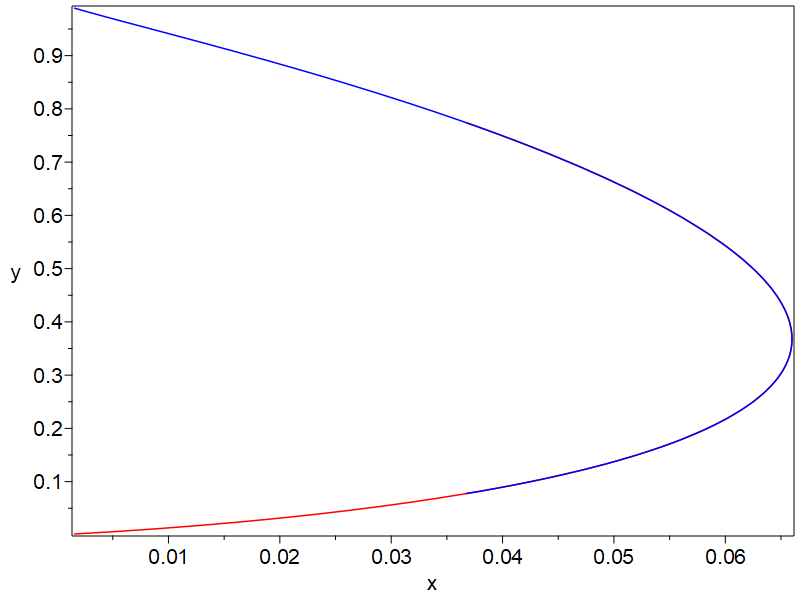

In [54]:
z := exp( lambda ):
plot( [[z,exp(B),p=0..10], [z, exp(A), p=0..10]], colour=[red,blue], labels=["x","y"] );

We see that Euler's solution parameterizes the two-cycles differently; when we used the Lambert $W$ solution, both $A$ and $B$ were pure functions of $x$.

The complex case is somewhat different.  In that case, all the solutions turn out to be
\begin{align}
B &= \frac{\ln_k p}{1-p} \\
A &= \frac{p\ln_k p}{1-p} \\
\lambda &= \frac{ \ln_k p }{ (1-p) p^{p/(1-p)} e^{2\pi i k/(1-p)} } 
\end{align}
where $\ln_k p = \ln p + 2\pi i k$ denotes the branched logarithm.  The branch may be arbitrary, so long as it is consistent among all three.  Now $p$ need not be real.

One wonders if the branch chasing for $AB = \exp i\theta$ would be easier using Euler's solution.  Because one would have to solve the nonlinear equation
\begin{equation}
\frac{p\ln^2_k p}{(1-p)^2} = e^{i\theta}
\end{equation}
we do not think so, but we have not tried.

### Karamata's series in Maple

It turns out that we only needed the first terms of Karamata's series to get the path-following method started.  However, Karamata's series is interesting in and of itself.  We show here how to compute it in Maple.  

First, we use the built-in __series__ command, with assumptions.

In [55]:
series( W((mu-1)*exp(mu-1)), mu ) assuming mu > 0;

$$-1+\mu$$

That just gave us the same branch.  We want the _other_ real branch.

In [56]:
series( W((mu-1)*exp(mu-1)), mu ) assuming mu<0 ;

$$-1-\mu -\frac{2}{3} \mu^{2}-\frac{4}{9} \mu^{3}-\frac{44}{135} \mu^{4}-\frac{104}{405} \mu^{5}+\mathrm{O}\left(\mu^{6}\right)$$

Karamata himself computed the series to $15$ terms.

In [57]:
K15 := series( -1 - W( (mu-1)*exp(mu-1) ), mu, 16 ) assuming Re(mu)<0 ;

$$\mu +\frac{2}{3} \mu^{2}+\frac{4}{9} \mu^{3}+\frac{44}{135} \mu^{4}+\frac{104}{405} \mu^{5}+\frac{40}{189} \mu^{6}+\frac{7648}{42525} \mu^{7}+\frac{2848}{18225} \mu^{8}+\frac{31712}{229635} \mu^{9}+\frac{23429344}{189448875} \mu^{10}+\frac{89072576}{795685275} \mu^{11}+\frac{1441952704}{14105329875} \mu^{12}+\frac{893393408}{9499507875} \mu^{13}+\frac{9352282112}{107417512125} \mu^{14}+\frac{11547336704}{142492618125} \mu^{15}+\mathrm{O}\left(\mu^{16}\right)$$

Another way to get that is to use the other real branch of $W$ explicitly.

In [58]:
series( W(-1, (mu-1)*exp(mu-1) ), mu ) assuming mu>0 ;

$$-1-\mu -\frac{2}{3} \mu^{2}-\frac{4}{9} \mu^{3}-\frac{44}{135} \mu^{4}-\frac{104}{405} \mu^{5}+\mathrm{O}\left(\mu^{6}\right)$$

Alternatively we could use the $\sigma$ form.  Notice that $\sigma = -\mu$ gives the previous series.

In [59]:
series( W(-(1+sigma)*exp(-1-sigma)), sigma ) assuming sigma>0;

$$-1+\sigma -\frac{2}{3} \sigma^{2}+\frac{4}{9} \sigma^{3}-\frac{44}{135} \sigma^{4}+\frac{104}{405} \sigma^{5}+\mathrm{O}\left(\sigma^{6}\right)$$

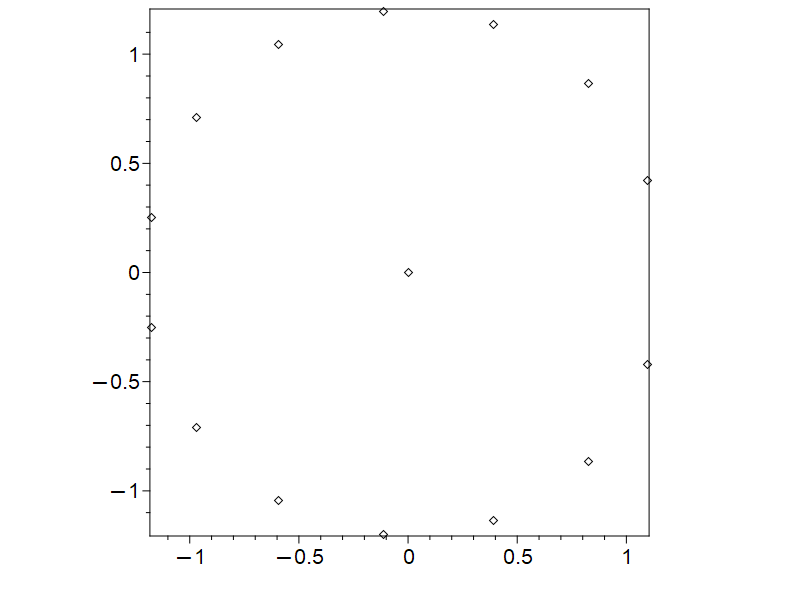

In [60]:
zeros15 := fsolve( convert(K15,polynom), mu, complex ):
plots[complexplot]( [zeros15], style=point, scaling=constrained )

An easy way to check that the radius of convergence is $1$ is to plot the zeros of the truncated Taylor polynomial.  One will see an approximation to the Szegő curve, which lies outside the circle of convergence.  Here we see an approximate circle (apart from the true zero at $\mu=0$).  This picture is consistent with the knowledge that the radius of convergence is $1$.

In [61]:
K150 := series( -1 - W( (mu-1)*exp(mu-1) ), mu, 151 ) assuming Re(mu)<0 :
zeros150 := fsolve( convert(K150,polynom), mu, complex ):


kilobytes used=4923776, alloc=26017, time=446.86

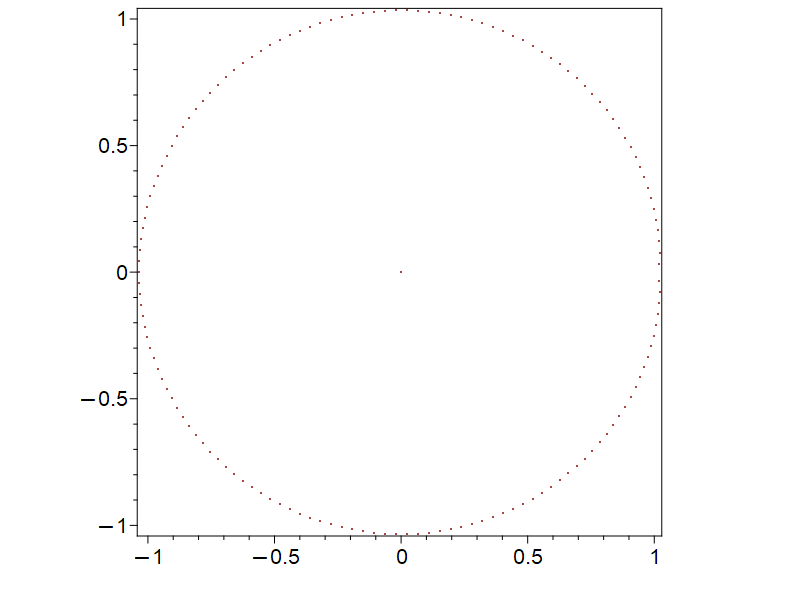

In [62]:
plots[complexplot]( [zeros150], style=point, symbol=point, color="Executive Red", scaling=constrained )

Now let's return to the approximation of $B$ by using this series, and compare the results to the use of just the first term.

In [63]:
Order := 20:
KO := series( -1 - W( (mu-1)*exp(mu-1) ), mu ) assuming Re(mu)<0 :
longstart := series( (1+KO)*(1-mu), mu ); # = exp(I*theta) = 1 - q where q = 1-exp(I*theta)

        304456140053690625        351646841762012671875

$$1-\frac{1}{3} \mu^{2}-\frac{2}{9} \mu^{3}-\frac{16}{135} \mu^{4}-\frac{28}{405} \mu^{5}-\frac{128}{2835} \mu^{6}-\frac{1352}{42525} \mu^{7}-\frac{3008}{127575} \mu^{8}-\frac{20864}{1148175} \mu^{9}-\frac{2733056}{189448875} \mu^{10}-\frac{46653344}{3978426375} \mu^{11}-\frac{1507672576}{155158628625} \mu^{12}-\frac{761632448}{93095177175} \mu^{13}-\frac{1949832704}{279285531525} \mu^{14}-\frac{42078838784}{6982138288125} \mu^{15}-\frac{21828667061248}{4154372281434375} \mu^{16}-\frac{57592766534144}{12463116844303125} \mu^{17}-\frac{1246835331899392}{304456140053690625} \mu^{18}-\frac{1284944119174216192}{351646841762012671875} \mu^{19}+\mathrm{O}\left(\mu^{20}\right)$$

In [64]:
brch := solve( longstart = 1-q, mu );

kilobytes used=5041503, alloc=29089, time=459.00

$$\sqrt{3} \sqrt{q}-q +\frac{3 \sqrt{3} q^{\frac{3}{2}}}{10}-\frac{2 q^{2}}{5}+\frac{241 \sqrt{3} q^{\frac{5}{2}}}{1400}-\frac{44 q^{3}}{175}+\frac{1677 \sqrt{3} q^{\frac{7}{2}}}{14000}-\frac{32 q^{4}}{175}+\frac{789269 \sqrt{3} q^{\frac{9}{2}}}{8624000}-\frac{48304 q^{5}}{336875}+\frac{414222299 \sqrt{3} q^{\frac{11}{2}}}{5605600000}-\frac{2578848 q^{6}}{21896875}+\frac{48561670763 \sqrt{3} q^{\frac{13}{2}}}{784784000000}-\frac{6955008 q^{7}}{69671875}+\frac{1418867460247 \sqrt{3} q^{\frac{15}{2}}}{26682656000000}-\frac{805571328 q^{8}}{9306171875}+\frac{20784206864291679 \sqrt{3} q^{\frac{17}{2}}}{446134008320000000}-\frac{7278448625408 q^{9}}{95304506171875}+O\left(q^{\frac{19}{2}}\right),-\sqrt{3} \sqrt{q}-q -\frac{3 \sqrt{3} q^{\frac{3}{2}}}{10}-\frac{2 q^{2}}{5}-\frac{241 \sqrt{3} q^{\frac{5}{2}}}{1400}-\frac{44 q^{3}}{175}-\frac{1677 \sqrt{3} q^{\frac{7}{2}}}{14000}-\frac{32 q^{4}}{175}-\frac{789269 \sqrt{3} q^{\frac{9}{2}}}{8624000}-\frac{48304 q^{5}}{336875}-\frac{414222299 \sqrt{3} q^{\frac{11}{2}}}{5605600000}-\frac{2578848 q^{6}}{21896875}-\frac{48561670763 \sqrt{3} q^{\frac{13}{2}}}{784784000000}-\frac{6955008 q^{7}}{69671875}-\frac{1418867460247 \sqrt{3} q^{\frac{15}{2}}}{26682656000000}-\frac{805571328 q^{8}}{9306171875}-\frac{20784206864291679 \sqrt{3} q^{\frac{17}{2}}}{446134008320000000}-\frac{7278448625408 q^{9}}{95304506171875}+O\left(q^{\frac{19}{2}}\right)$$

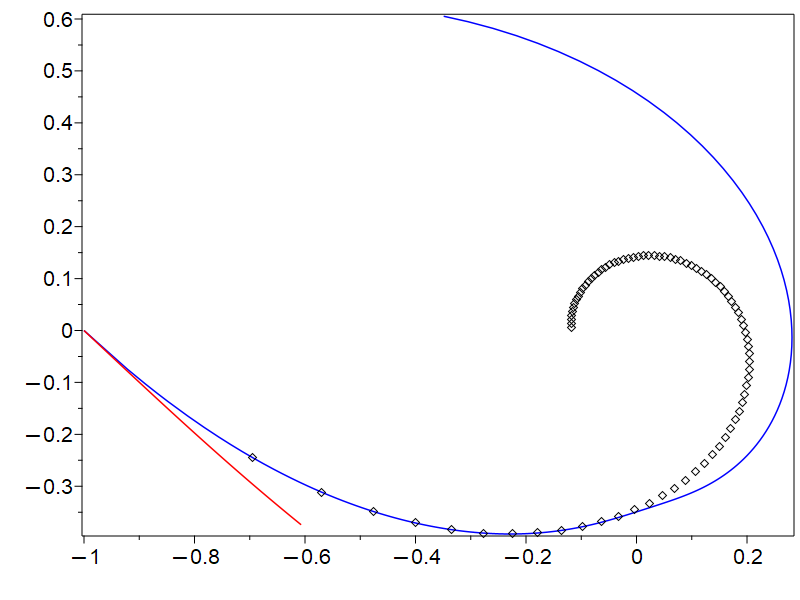

In [65]:
mu1 := eval(convert(brch[1],polynom), q=1-exp(I*theta) ):
mu1plot := plot( [Re(-1+mu1),Im(-1+mu1),theta=0..Pi/2], colour=blue):
plots[display]( mu1plot, bplot[1], approxplot );

We see a much better match to the initial part of the curve; up to the first quarter of the curve, and a little bit more.  Thereafter this Puiseux series approximation departs from the true curve.  We expect that if we increase the __Order__ that the agreement will improve somewhat.  When we changed __Order__ from 15 to 20 this indeed occurred.